# Quasar Redshift Estimates with Redrock. DESI simulated Spectra

The goal of this notebook is to generate a set of quasar spectra simulations, that are then analized with redrock to obtain the 
redshift.  
We assume that desi code is installed as described in :
https://desi.lbl.gov/trac/wiki/Pipeline/GettingStarted/Laptop/JuneMeeting
The only identified issue is with astropy v2, this should be downgraded to v1.3.3, after installing healpy. If installed before, healpy will upgrade again and then functions dealing with writting fits files will complain.

TODO:Check that there is a warning when calling the new_exposure funcion..

First we import the basic modules we need. 

In [1]:
import os
import matplotlib.pyplot as plt

%pylab inline


import numpy as np
from astropy.io import fits
from astropy.table import Table
import desispec.io
import desisim.io
from desisim.obs import new_exposure
from desisim.scripts import quickgen
from desispec.scripts import group_spectra




Populating the interactive namespace from numpy and matplotlib


/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Environment variables and data

We will specify the enviroment variables, specially where to find the DESI spectra templates, and where do we want to save the simulated spectra. Then check enviroment variables. I assumes the desi enviroment is already set. 

In [2]:
def check_env():
    for env in ('DESIMODEL', 'DESI_ROOT', 'DESI_SPECTRO_SIM', 'DESI_SPECTRO_DATA', 
            'DESI_SPECTRO_REDUX', 'SPECPROD', 'PIXPROD'):
        if env in os.environ:
            print('{} environment set to {}'.format(env, os.getenv(env)))
        else:
            print('Required environment variable {} not set!'.format(env))
            
check_env()

%set_env SPECPROD=alxogm/test_qso_only2
%set_env PIXPROD=alxogm/test_qso_only2
rawdata_dir = desisim.io.simdir()
%set_env DESI_SPECTRO_DATA=$rawdata_dir

print('Simulated raw data will be written to {}'.format(desisim.io.simdir()))
print('Pipeline will read raw data from {}'.format(desispec.io.rawdata_root()))
print('    (without knowing that it was simulated)')
print('Pipeline will write processed data to {}'.format(desispec.io.specprod_root()))

DESIMODEL environment set to /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master
DESI_ROOT environment set to /global/project/projectdirs/desi
DESI_SPECTRO_SIM environment set to /global/project/projectdirs/desi/spectro/sim
DESI_SPECTRO_DATA environment set to /global/project/projectdirs/desi/spectro/data
DESI_SPECTRO_REDUX environment set to /global/project/projectdirs/desi/spectro/redux
SPECPROD environment set to alxogm
PIXPROD environment set to alxogm
env: SPECPROD=alxogm/test_qso_only2
env: PIXPROD=alxogm/test_qso_only2
env: DESI_SPECTRO_DATA=/global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/
Simulated raw data will be written to /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/
Pipeline will read raw data from /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/
    (without knowing that it was simulated)
Pipeline will write processed data to /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only

# Generate Noisless Spectra. 
We will use the "new_exposure" function to generate noiseless spectra, this requires the following parameters: 

In [6]:
# Here we are  genereting 1000 quasar spectra, the seed and night are set to date, so that we know when this was generated 
# and can be reproduced. 
nspec = 100
seed = 20171205
flavor = 'QSO'     ##Change to QSO, if one wants to mainly generate QSO's   
night = '20171205'
expid = 0
#It will geneterate some stars according to modelin os.getenv('DESIMODEL')+'/data/spectra/spec-sky.dat'

In [5]:
new_exposure?

In [7]:
'''Uncomment this lines if you want to generate  fibermap and simspec files to simulate the spectra, instead of using files 
previously generated'''
sim, fibermap, meta, obsconditions = new_exposure('qso', nspec=nspec, seed=seed, night=night, 
                               expid=expid)

/global/common/cori/contrib/desi/desiconda/current/code/desisim/master/py/desisim/targets.py:368: RuntimeWarning: invalid value encountered in log10
  fibermap['MAG'][ii, 3] = 22.5 - 2.5 * np.log10(meta['FLUX_W1'][ii])


INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:i

/global/common/cori/contrib/desi/desiconda/current/code/desisim/master/py/desisim/targets.py:368: RuntimeWarning: invalid value encountered in log10
  fibermap['MAG'][ii, 3] = 22.5 - 2.5 * np.log10(meta['FLUX_W1'][ii])


INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits
DEBUG:simexp.py:379:simulate_spectra: loading specsim desi config
DEBUG:simexp.py:383:simulate_spectra: creating specsim desi simulator
DEBUG:specsim.py:39:get_simulator: Creating new  Simulator
INFO:simexp.py:404:simulate_spectra: MJD not in obsconditions, using DATE-OBS 2009-06-18T12:00:00.000
DEBUG:simexp.py:408:simulate_spectra: obsconditions EXPTIME = 1000
DEBUG:simexp.py:408:simulate_spectra: obsconditions MOONFRAC = 0.0
DEBUG:simexp.py:408:simulate_spectra: obsconditions SEEING = 1.1
DEBUG:simexp.py:408:simulate_spectra: obsconditions MOONALT = -60
DEBUG:simexp.py:408:simulate_spectra: obsconditions MOONSEP = 180
DEBUG:simexp.py:408:simulate_spectra: obsconditions AIRMASS = 1.0
DEBUG:simexp.py:611:ge

Now that the fiber and simspec files were generated we proceed to simulate de spectra using quickgen function.
NOTE: The quickspectra function is in github, but for some reason I can not see it from my instalation, I'll check if it is available in  NERSC. 

In [8]:
'''Uncomment this lines if you want to use the fibermap and simspec files generated in advance '''
fiberfile = desispec.io.findfile('fibermap', night=night, expid=expid)
simspecfile = desisim.io.findfile('simspec', night=night, expid=expid)

In [9]:
'''Uncomment this lines if you want to plot the redshift distribution generated by the previous result of 
a new_exposure function, otherwise just  plot the distribution in the next cell'''
print('Reading fibermap file {}'.format(fiberfile))
hdu = fits.open(fiberfile)      
fibermap = Table(hdu['FIBERMAP'].data)
hdu.close()
print('Reading simspec file {}.'.format(simspecfile))
hdu = fits.open(simspecfile)
meta = Table(hdu['TRUTH'].data)
hdu.close()

Reading fibermap file /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/fibermap-00000000.fits
Reading simspec file /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/simspec-00000000.fits.


(-0.2, 4.3643213033676149)

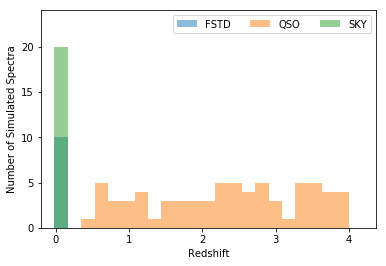

In [10]:
allobjtype = meta['OBJTYPE']
redlim = (-0.2, 1.1*meta['REDSHIFT'].max())
fig, ax = plt.subplots()
for objtype in sorted(set(allobjtype)):
    indx = objtype == allobjtype
    hh = ax.hist(meta['REDSHIFT'][indx], bins=25, 
                 label=objtype, alpha=0.5, range=redlim)
    
ax.set_xlabel('Redshift')
ax.set_ylabel('Number of Simulated Spectra')
ax.legend(loc='upper right', ncol=3)
ax.margins(0.2)
ax.set_xlim(redlim)

In [11]:
#outdir_truth option seems not to work... 
args = quickgen.parse([
    '--simspec', simspecfile,
    '--fibermap', fiberfile,
    '-n 100','--outdir-truth', desisim.io.simdir(),
])
quickgen.main(args)

INFO:quickgen.py:239:main: Reading fibermap file /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/fibermap-00000000.fits
DEBUG:simexp.py:611:get_source_types: qso 70 targets
DEBUG:simexp.py:611:get_source_types: sky 20 targets
DEBUG:simexp.py:611:get_source_types: star 10 targets
INFO:quickgen.py:272:main: Initializing SpecSim with config desi
DEBUG:specsim.py:39:get_simulator: Creating new desi Simulator
INFO:quickgen.py:278:main: Reading input file /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/simspec-00000000.fits
INFO:quickgen.py:675:main: Writing files for channel:b, spectrograph:0, spectra:0 to 100
INFO:quickgen.py:702:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/frame-b0-00000000.fits
INFO:quickgen.py:720:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/cframe-b0-00000000.fits
INFO:quickgen.

INFO:quickgen.py:702:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/frame-r0-00000000.fits
INFO:quickgen.py:720:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/cframe-r0-00000000.fits
INFO:quickgen.py:735:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/sky-r0-00000000.fits
INFO:quickgen.py:756:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/calib-r0-00000000.fits
INFO:quickgen.py:675:main: Writing files for channel:z, spectrograph:0, spectra:0 to 100
INFO:quickgen.py:702:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205/00000000/frame-z0-00000000.fits
INFO:quickgen.py:720:main: Wrote file /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171

We have genereted the simmulated spectra, before analyzing them with redrock, we group them in the brick format 

In [12]:
nside = 64
args = group_spectra.parse(['--hpxnside', '{}'.format(nside),'--nights','{}'.format(night)])
group_spectra.main(args)

INFO:group_spectra.py:74:main: Starting at Tue Dec  5 07:13:34 2017
INFO:group_spectra.py:75:main:   using raw dir /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2
INFO:group_spectra.py:76:main:   using spectro production dir /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2
INFO:group_spectra.py:197:main: Distributing 2 spectral groups among 1 processes
INFO:group_spectra.py:220:main:   (0000) Begin spectral group spectra-64-12637 at Tue Dec  5 07:13:34 2017
INFO:group_spectra.py:294:main:   (0000) End spectral group spectra-64-12637 at Tue Dec  5 07:14:56 2017
INFO:group_spectra.py:220:main:   (0000) Begin spectral group spectra-64-12639 at Tue Dec  5 07:14:56 2017
INFO:group_spectra.py:294:main:   (0000) End spectral group spectra-64-12639 at Tue Dec  5 07:15:16 2017
INFO:group_spectra.py:301:main: Finishing at Tue Dec  5 07:15:16 2017


In [15]:
specfile = desispec.io.findfile('spectra', groupname='12637', nside=64)
specfile

'/global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/spectra-64/126/12637/spectra-64-12637.fits'

In [21]:
zoutfile = '/global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/spectra-64/126/12637/zbest-64-12637.fits'
cmd = 'rrdesi {} --zbest {}'.format(specfile, zoutfile)
if 'NERSC_HOST' in os.environ:
    print('Running on a batch node:')
    print(cmd)
    print()
    srun = 'srun -A desi -N 1 -t 00:10:00 -C haswell --qos interactive'
    cmd = '{srun} {cmd} --ncpu 32'.format(srun=srun, cmd=cmd)

!$cmd


    

Running on a batch node:
rrdesi /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/spectra-64/126/12637/spectra-64-12637.fits --zbest /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/spectra-64/126/12637/zbest-64-12637.fits

INFO: reading targets
INFO: reading templates
INFO: Can't find redshift range info in template file /global/common/cori/contrib/desi/desiconda/current/code/redrock-templates/master/rrtemplate-star-A.fits, using default values
INFO: Can't find redshift range info in template file /global/common/cori/contrib/desi/desiconda/current/code/redrock-templates/master/rrtemplate-star-B.fits, using default values
INFO: Can't find redshift range info in template file /global/common/cori/contrib/desi/desiconda/current/code/redrock-templates/master/rrtemplate-star-M.fits, using default values
INFO: Can't find redshift range info in template file /global/common/cori/contrib/desi/desiconda/current/code/redrock-templates/master/rrtemplate-galax

Next we analyze the redrock output by comparing the redshift histogram from the redrock output 
to that from the original fibermap and specsim files. If fibermap, simspec and redrock output was generated in a previous jupyter sesion, we can start the notebook in this point. We then should uncooment the following cell

In [17]:
import os
import matplotlib.pyplot as plt


%pylab inline
import numpy as np
from astropy.io import fits
from astropy.table import Table,vstack
import desispec.io
import desisim.io

def check_env():
    for env in ('DESIMODEL', 'DESI_ROOT', 'DESI_SPECTRO_SIM', 'DESI_SPECTRO_DATA', 
            'DESI_SPECTRO_REDUX', 'SPECPROD', 'PIXPROD'):
        if env in os.environ:
            print('{} environment set to {}'.format(env, os.getenv(env)))
        else:
            print('Required environment variable {} not set!'.format(env))
check_env()

%set_env SPECPROD=alxogm/test_qso_only2
%set_env PIXPROD=alxogm/test_qso_only2
rawdata_dir = desisim.io.simdir()
%set_env DESI_SPECTRO_DATA=$rawdata_dir

night = '20171205'
expid = 0
fiberfile = desispec.io.findfile('fibermap', night=night, expid=expid)
simspecfile = desisim.io.findfile('simspec', night=night, expid=expid)
reduxdir = desispec.io.specprod_root()
!find $reduxdir | sort

Populating the interactive namespace from numpy and matplotlib
DESIMODEL environment set to /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master
DESI_ROOT environment set to /global/project/projectdirs/desi
DESI_SPECTRO_SIM environment set to /global/project/projectdirs/desi/spectro/sim
DESI_SPECTRO_DATA environment set to /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/
DESI_SPECTRO_REDUX environment set to /global/project/projectdirs/desi/spectro/redux
SPECPROD environment set to alxogm/test_qso_only2
PIXPROD environment set to alxogm/test_qso_only2
env: SPECPROD=alxogm/test_qso_only2
env: PIXPROD=alxogm/test_qso_only2
env: DESI_SPECTRO_DATA=/global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/
/global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2
/global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures
/global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/exposures/20171205
/glob

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
print('Reading fibermap file {}'.format(fiberfile))
hdu = fits.open(fiberfile)
fibermap = Table(hdu['FIBERMAP'].data)
hdu.close()
print('Reading simspec file {}.'.format(simspecfile))
hdu = fits.open(simspecfile)
meta = Table(hdu['TRUTH'].data)
hdu.close()


Reading fibermap file /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/fibermap-00000000.fits
Reading simspec file /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/simspec-00000000.fits.


In [22]:
specfile = desispec.io.findfile('spectra', groupname='12637', nside=64)
zbestfile = desispec.io.findfile('zbest', groupname='12637', nside=64)
spectra = desispec.io.read_spectra(specfile)
zbest = Table.read(zbestfile)
#print (len(zbest))

Lets use the TARGETID's from zbest to look for them in the fibermap to get the true REDSHIFT and SPECTYPE of such sources. We save that in  the ztruth table.

In [23]:
ztruth=meta[fibermap['TARGETID']==zbest['TARGETID'][0]]

for i in range(1,len(zbest)):
    tmp=meta[fibermap['TARGETID']==zbest['TARGETID'][i]]
    ztruth=vstack([ztruth,tmp])


Now we make the histogram of sources at a given redshift for both the sources in zbest, and fibermap. Ideally these should look like the same. 

zbest results from Redrock on /global/project/projectdirs/desi/spectro/redux/alxogm/test_qso_only2/spectra-64/126/12637/zbest-64-12637.fits
GALAXY : 24.0
QSO : 43.0
STAR : 8.0
Ztruth the /global/project/projectdirs/desi/spectro/sim/alxogm/test_qso_only2/20171205/simspec-00000000.fits file
FSTD : 8.0
QSO : 52.0
SKY : 15.0


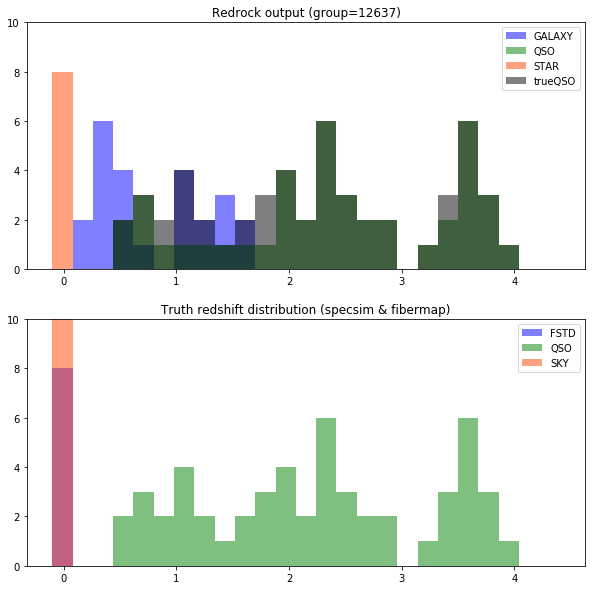

In [28]:
fig.clear()
fig, ax = plt.subplots(2,1,figsize=(10,10))

print('zbest results from Redrock on {}'.format(zbestfile))
for spectype in sorted(set(zbest['SPECTYPE'])):
    if spectype=='STAR':
        color='orangered'
    if spectype=='GALAXY':
        color='b'
    if spectype=='QSO':
        color='g'
    jj = (zbest['SPECTYPE'] == spectype)
   # print(spectype,':',sum(hist(zbest['Z'][jj], 25, (-0.1,4.4))[0]))
    nhist=ax[0].hist(zbest['Z'][jj], 25, (-0.1,4.4),color=color,label=format(spectype),alpha=0.5)[0]
    print(spectype,':',sum(nhist))


    ax[0].set_ylim(0,10)
ax[0].set_title('Redrock output (group=12637)')

print('Ztruth the {} file'.format(simspecfile))

allobjtype = meta['OBJTYPE']
for objtype in sorted(set(allobjtype)):
    if objtype=='FSTD':
        color='b'
    if objtype=='SKY':
        color='orangered'
    if objtype=='QSO':
        color='green'
       # ax[0].hist(ztruth['REDSHIFT'][ii],25,(-0.1,4.4),color='black',label='true'+format(objtype),alpha=0.5)[0]


    ii = (ztruth['OBJTYPE'] == objtype)
    if objtype=='QSO':
        ax[0].hist(ztruth['REDSHIFT'][ii],25,(-0.1,4.4),color='black',label='true'+format(objtype),alpha=0.5)[0]
    
    nhist=ax[1].hist(ztruth['REDSHIFT'][ii],25,(-0.1,4.4),color=color,label=format(objtype),alpha=0.5)[0]
    ax[1].set_ylim(0,10)
    print(objtype,':',sum(nhist))
ax[1].set_title('Truth redshift distribution (specsim & fibermap)')
fig.subplots_adjust(hspace=0.2)
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')





    



TODO: make a larger sample, and analyze the failures...

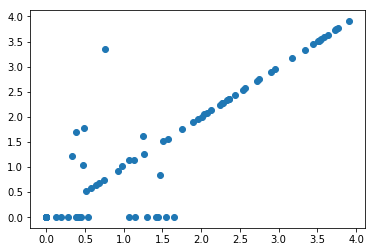

In [30]:
scatter(zbest['Z'],ztruth['REDSHIFT'])

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


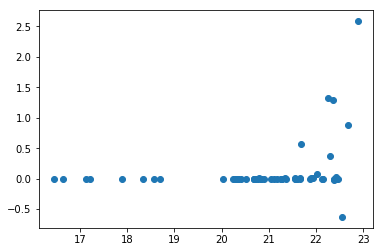

In [49]:
mag_g = 22.5 - 2.5 * np.log10(ztruth['FLUX_G'])
plt.scatter(mag_g,ztruth['REDSHIFT']-zbest['Z'])